In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
#Load and Preprocess Data
stock_data = pd.read_csv("./Stock_price_dataset/TCS.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index("Date", inplace=True)

In [3]:
stock_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172


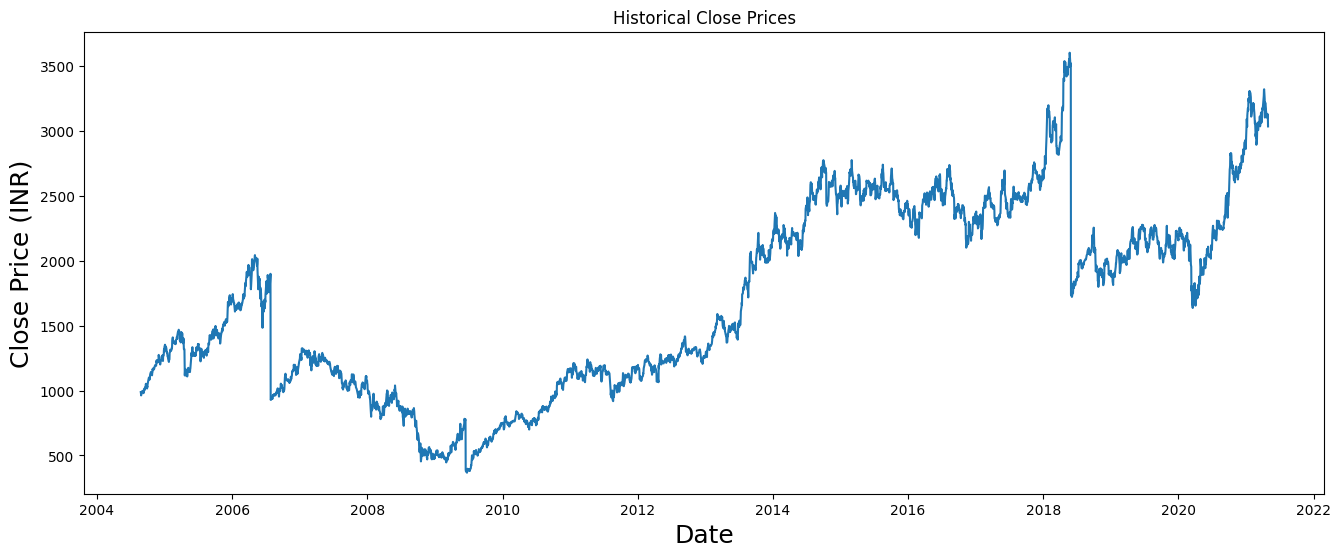

In [4]:
# Visualize Historical Close Prices
plt.figure(figsize=(16, 6))
plt.title('Historical Close Prices')
plt.plot(stock_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)
plt.show()

In [5]:
# Feature Scaling
close_prices = stock_data.filter(['Close'])
scaled_close_prices = MinMaxScaler(feature_range=(0, 1)).fit_transform(close_prices.values)

In [6]:
# Prepare Training Dataset
train_len = int(np.ceil(len(close_prices) * 0.95))
train_data = scaled_close_prices[0:train_len, :]

In [7]:
#  Reshape Data for LSTM
X_train, y_train = [], []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(X_train)
        print(y_train)
        print()

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

[array([0.19193401, 0.18916915, 0.18411826, 0.19156331, 0.19198035,
       0.19191857, 0.19369488, 0.19499235, 0.19406558, 0.19429728,
       0.19371032, 0.18946263, 0.1921966 , 0.19673777, 0.20049119,
       0.19754097, 0.19826694, 0.20322516, 0.20273088, 0.20980522,
       0.21173599, 0.20500147, 0.20455353, 0.2020667 , 0.2004603 ,
       0.20523316, 0.20402836, 0.21039218, 0.21928917, 0.22058665,
       0.22086468, 0.22565299, 0.22594646, 0.22674966, 0.22324339,
       0.22174511, 0.23155342, 0.23458087, 0.23805625, 0.23989435,
       0.23682056, 0.23444185, 0.23190868, 0.23804081, 0.2388749 ,
       0.24692235, 0.2439258 , 0.24837429, 0.24499158, 0.24977989,
       0.24829706, 0.24676789, 0.25254476, 0.25385768, 0.25569577,
       0.25628273, 0.25643719, 0.25462999, 0.25910937, 0.26701781])]
[0.26272377627778376]

[array([0.19193401, 0.18916915, 0.18411826, 0.19156331, 0.19198035,
       0.19191857, 0.19369488, 0.19499235, 0.19406558, 0.19429728,
       0.19371032, 0.18946263, 0.19

In [8]:
# Build and Compile LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the Model
history= model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50

122/122 [==============================] - 13s 79ms/step - loss: 0.0048
Epoch 2/50
122/122 [==============================] - 10s 80ms/step - loss: 8.1746e-04
Epoch 3/50
122/122 [==============================] - 9s 76ms/step - loss: 7.1308e-04
Epoch 4/50
122/122 [==============================] - 9s 78ms/step - loss: 6.7894e-04
Epoch 5/50
122/122 [==============================] - 9s 77ms/step - loss: 5.7513e-04
Epoch 6/50
122/122 [==============================] - 9s 72ms/step - loss: 5.0707e-04
Epoch 7/50
122/122 [==============================] - 10s 81ms/step - loss: 4.5888e-04
Epoch 8/50
122/122 [==============================] - 10s 79ms/step - loss: 5.0634e-04
Epoch 9/50
122/122 [==============================] - 10s 79ms/step - loss: 3.9485e-04
Epoch 10/50
122/122 [==============================] - 10s 80ms/step - loss: 4.0011e-04
Epoch 11/50
122/122 [==============================] - 10s 81ms/step - loss: 3.8383e-04
Epoch 12/50
122/122 [===========================

In [10]:
# Prepare Test Data
test_data = scaled_close_prices[train_len - 60:, :]
X_test = []

In [11]:
# Reshape Test Data for Prediction
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
# Make Predictions and Inverse Scaling
predictions = model.predict(X_test)
predictions = MinMaxScaler(feature_range=(0, 1)).fit(close_prices.values).inverse_transform(predictions)


training_set = close_prices[:train_len]
validation_set = close_prices[train_len:]
validation_set['Predictions'] = predictions

#Evaluate RMSE
rmse = np.sqrt(np.mean(((predictions - validation_set['Close'].values) ** 2)))
print("Root Mean Squared Error (RMSE):", rmse)


7/7 [==============================] - 1s 15ms/step
Root Mean Squared Error (RMSE): 503.5632813171166


C:\Users\gnapika\AppData\Local\Temp\ipykernel_17868\2572244159.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set['Predictions'] = predictions


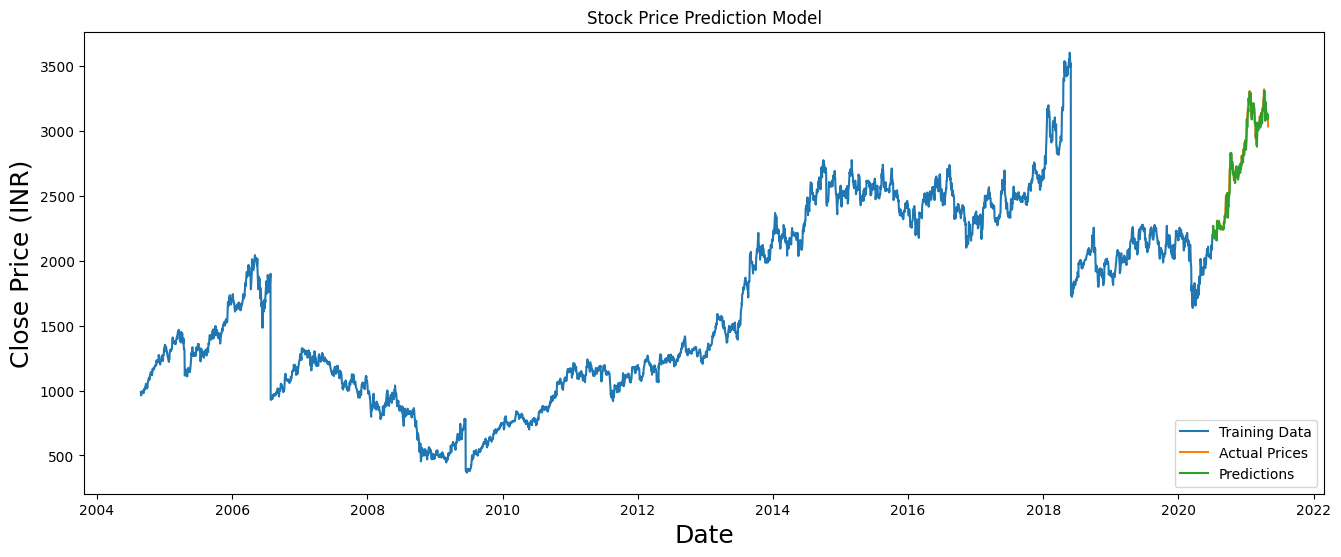

In [13]:
# Plot Predictions
plt.figure(figsize=(16, 6))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)
plt.plot(training_set['Close'], label='Training Data')
plt.plot(validation_set[['Close', 'Predictions']], label=['Actual Prices', 'Predictions'])
plt.legend(loc='lower right')
plt.show()


In [14]:
validation_set

,Close,Predictions
Date,,
2020-07-06,2263.20,2195.372070
2020-07-07,2269.90,2260.291748
2020-07-08,2218.90,2268.499268
2020-07-09,2204.35,2220.813721
2020-07-10,2222.35,2205.931641
...,...,...
2021-04-26,3100.80,3099.487549
2021-04-27,3132.00,3090.156250
2021-04-28,3124.10,3126.753174
